In [174]:
!pip install pandas

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [176]:
df = pd.read_csv(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\SC.csv", sep=';', encoding='latin1')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,"0,0805",ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,"0,0929",ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,"0,1171",ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,"0,165",ppm,Automatica,Referencia


In [177]:
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20.0,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21.0,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16.0,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia


In [178]:
df.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [179]:
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20.0,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21.0,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16.0,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia


In [180]:
# Filtrar dados apenas da estação SC_002 e poluentes que vou analisar

filtred_SC_002_df = df.loc[
(df['Codigo'] == 'SC_002') &
(df['Poluente'].isin(['MP10', 'PTS', 'SO2', 'NO2']))]

filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

filtred_SC_002_df = filtred_SC_002_df.set_index('Date')

filtred_SC_002_df = filtred_SC_002_df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto','Poluente','Valor', 'Unidade']]
filtred_SC_002_df['Dia_da_Semana'] = filtred_SC_002_df.index.day_name(locale='pt_BR').str[:3]

filtred_SC_002_df

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1835696248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)


,Ano,Mes,Dia,Hora,Minuto,Poluente,Valor,Unidade,Dia_da_Semana
Date,,,,,,,,,
2023-01-01 00:30:00,2023,1,1,0,30,PTS,20.0,ug/m3,Dom
2023-01-01 01:30:00,2023,1,1,1,30,PTS,17.0,ug/m3,Dom
2023-01-01 02:30:00,2023,1,1,2,30,PTS,21.0,ug/m3,Dom
2023-01-01 03:30:00,2023,1,1,3,30,PTS,16.0,ug/m3,Dom
2023-01-01 04:30:00,2023,1,1,4,30,PTS,17.0,ug/m3,Dom
...,...,...,...,...,...,...,...,...,...
2023-12-31 19:30:00,2023,12,31,19,30,NO2,NaN,ug/m3,Dom
2023-12-31 20:30:00,2023,12,31,20,30,NO2,NaN,ug/m3,Dom
2023-12-31 21:30:00,2023,12,31,21,30,NO2,NaN,ug/m3,Dom


In [181]:
print(filtred_SC_002_df['Poluente'].unique())

['PTS' 'SO2' 'MP10' 'NO2']


In [182]:
df_PTS = filtred_SC_002_df.query('Poluente =="PTS"')
df_SO2 = filtred_SC_002_df.query('Poluente =="SO2"')
df_MP10 = filtred_SC_002_df.query('Poluente == "MP10"')
df_NO2 = filtred_SC_002_df.query('Poluente == "NO2"')

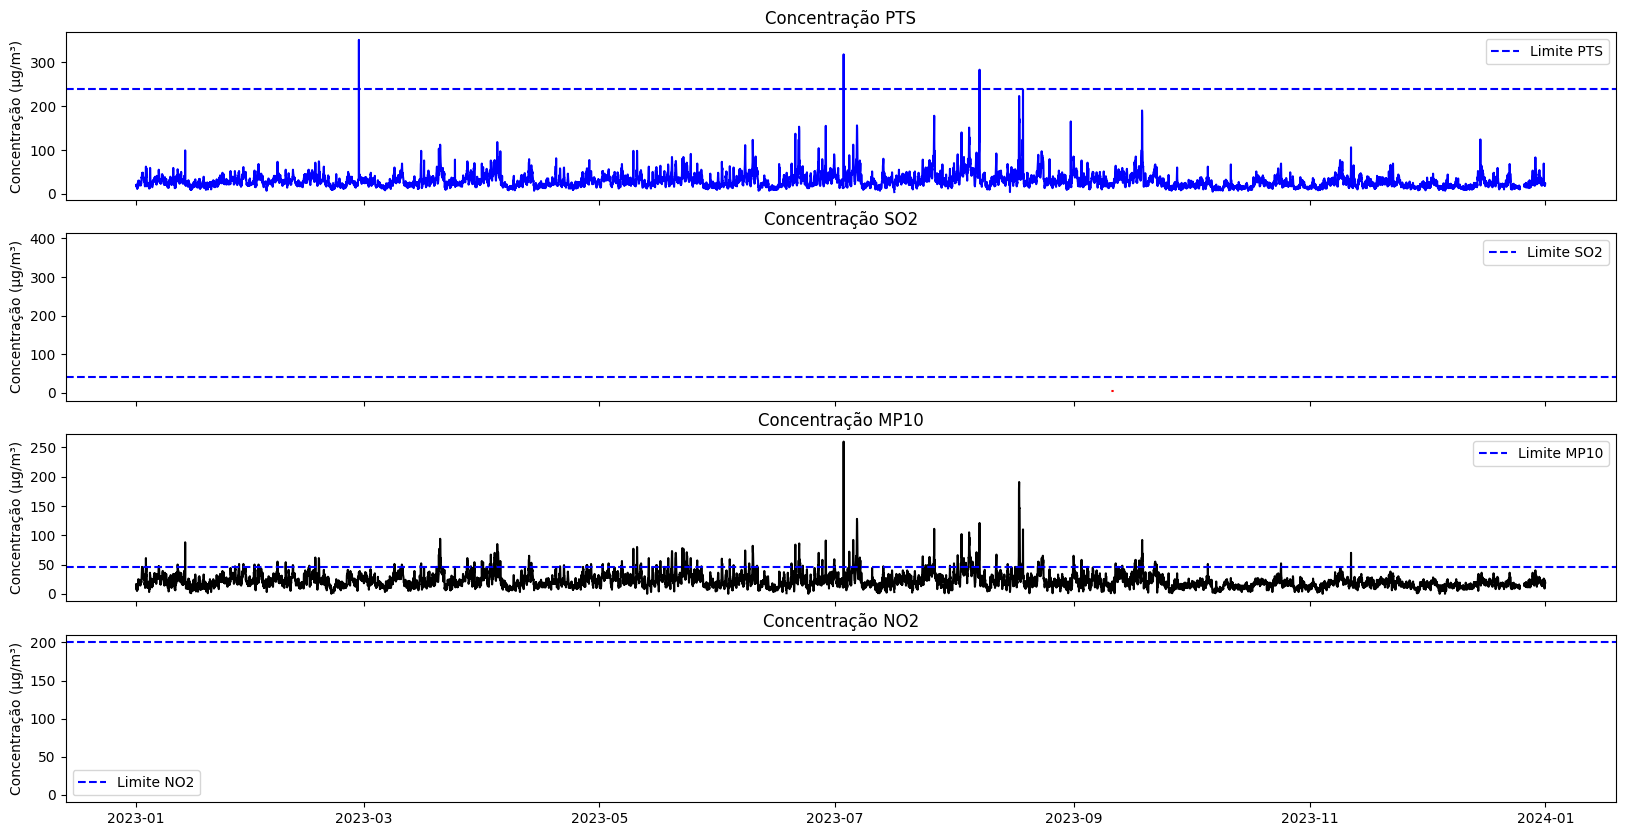

In [183]:
data = [
    (df_PTS, 'Concentração PTS', 'Concentração (µg/m³)', 240, 'blue'),
    (df_SO2, 'Concentração SO2', 'Concentração (µg/m³)', 40, 'red'),
    (df_MP10, 'Concentração MP10', 'Concentração (µg/m³)', 45, 'black'),
    (df_NO2, 'Concentração NO2', 'Concentração (µg/m³)', 200, 'green')
]

# Criando subplots
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))

# Loop para plotar cada gráfico
for i, (df, title, ylabel, limite, color) in enumerate(data):
    ax[i].plot(df.index, df['Valor'], color=color)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title)
    ax[i].set_ylabel(ylabel)
    ax[i].legend()


plt.show()

In [184]:
data

[(                      Ano  Mes  Dia  Hora  Minuto Poluente  Valor Unidade  \
  Date                                                                        
  2023-01-01 00:30:00  2023    1    1     0      30      PTS   20.0   ug/m3   
  2023-01-01 01:30:00  2023    1    1     1      30      PTS   17.0   ug/m3   
  2023-01-01 02:30:00  2023    1    1     2      30      PTS   21.0   ug/m3   
  2023-01-01 03:30:00  2023    1    1     3      30      PTS   16.0   ug/m3   
  2023-01-01 04:30:00  2023    1    1     4      30      PTS   17.0   ug/m3   
  ...                   ...  ...  ...   ...     ...      ...    ...     ...   
  2023-12-31 19:30:00  2023   12   31    19      30      PTS   19.0   ug/m3   
  2023-12-31 20:30:00  2023   12   31    20      30      PTS   24.0   ug/m3   
  2023-12-31 21:30:00  2023   12   31    21      30      PTS   18.0   ug/m3   
  2023-12-31 22:30:00  2023   12   31    22      30      PTS   19.0   ug/m3   
  2023-12-31 23:30:00  2023   12   31    23      30 

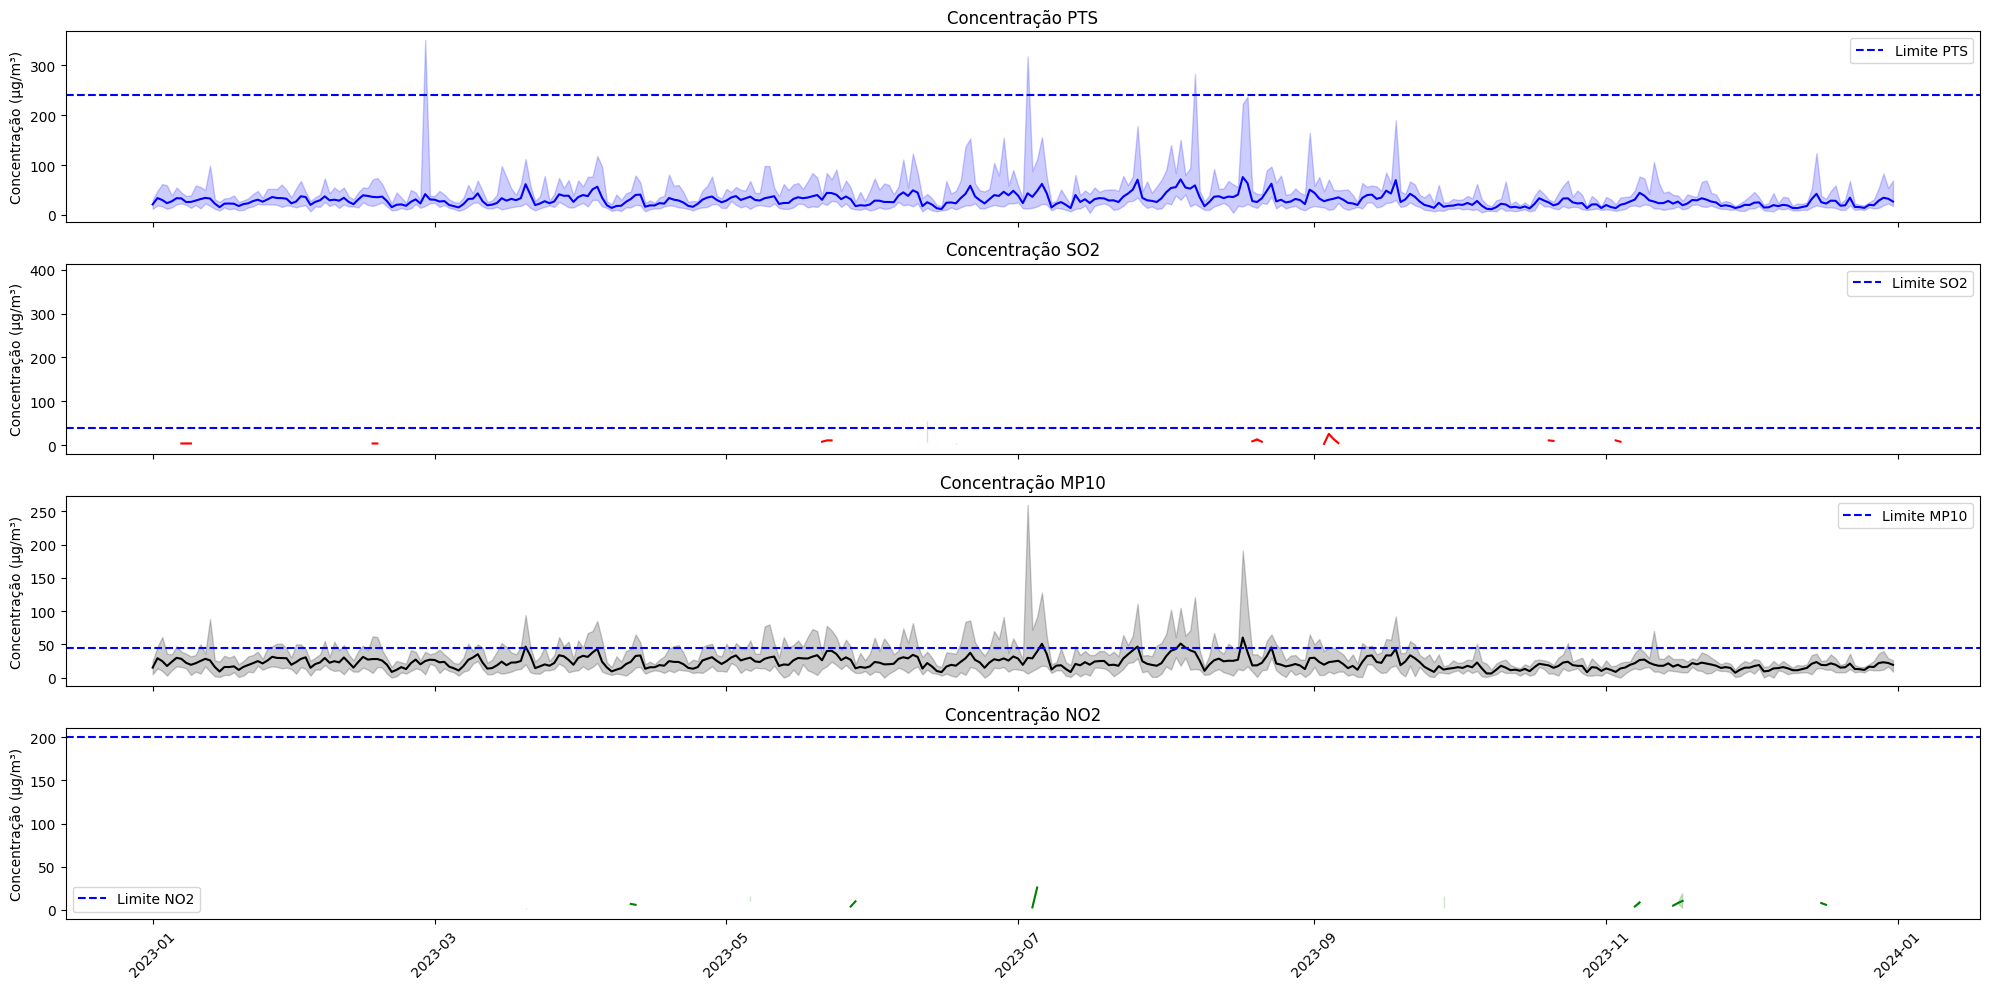

In [185]:
# Lista de poluentes

poluentes = {
    "PTS": ('blue', 240, 'µg/m³'),
    "SO2": ('red', 40, 'µg/m³'),
    "MP10": ('black', 45, 'µg/m³'),
    "NO2": ('green', 200, 'µg/m³')
}


# Criando subplots
fig, ax = plt.subplots(len(poluentes), 1, sharex=True, figsize=(20, 10))

# Plotando os dados em loop
for i, (poluente, (color, limite, unidade)) in enumerate(poluentes.items()):
    dff = filtred_SC_002_df.query(f'Poluente == "{poluente}"')

    # Agregando dados
    media_diaria = dff['Valor'].resample('D').mean()
    min_diaria = dff['Valor'].resample('D').min()
    max_diaria = dff['Valor'].resample('D').max()

    ax[i].plot(media_diaria.index, media_diaria, color=color)
    ax[i].fill_between(media_diaria.index, min_diaria, max_diaria, color=color, alpha=0.2)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {poluente}')

    ax[i].set_title(f'Concentração {poluente}')
    ax[i].set_ylabel(f'Concentração ({unidade})')
    ax[i].legend()

# Ajustando o eixo
ax[-1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [186]:
print(df.head())

                      Ano  Mes  Dia  Hora  Minuto Poluente  Valor Unidade  \
Date                                                                        
2023-01-01 00:30:00  2023    1    1     0      30      NO2    NaN   ug/m3   
2023-01-01 01:30:00  2023    1    1     1      30      NO2    NaN   ug/m3   
2023-01-01 02:30:00  2023    1    1     2      30      NO2    NaN   ug/m3   
2023-01-01 03:30:00  2023    1    1     3      30      NO2    NaN   ug/m3   
2023-01-01 04:30:00  2023    1    1     4      30      NO2    NaN   ug/m3   

                    Dia_da_Semana  
Date                               
2023-01-01 00:30:00           Dom  
2023-01-01 01:30:00           Dom  
2023-01-01 02:30:00           Dom  
2023-01-01 03:30:00           Dom  
2023-01-01 04:30:00           Dom  


C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\3213131834.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


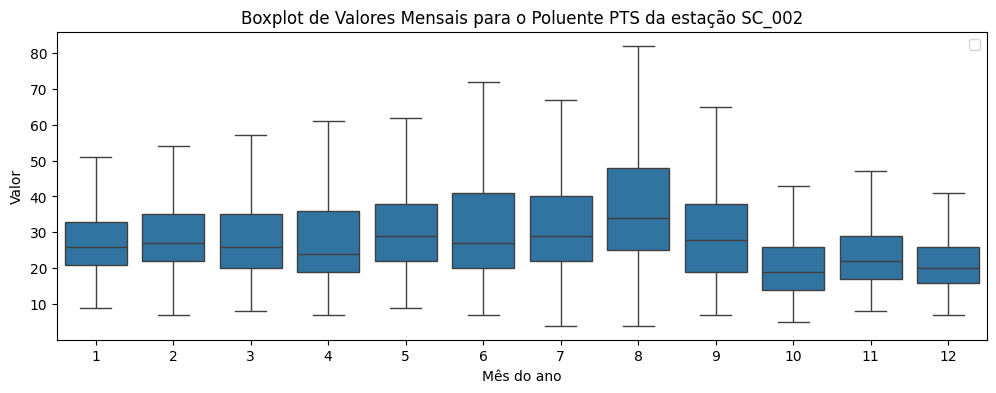

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\3213131834.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


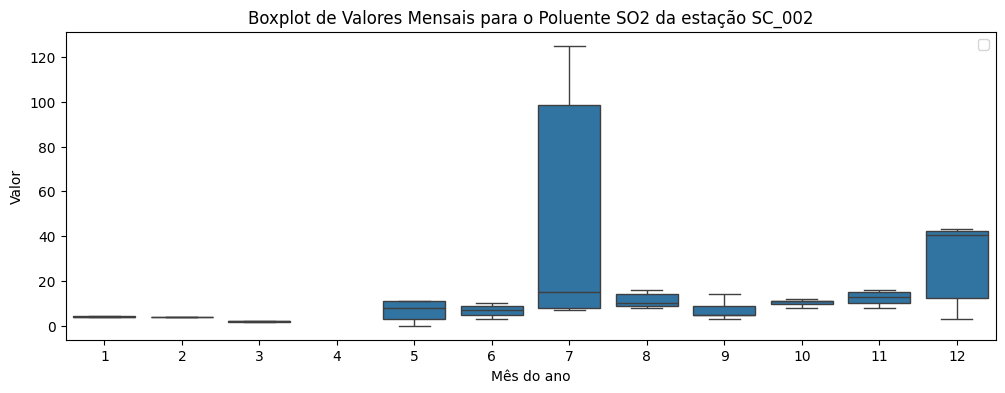

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\3213131834.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


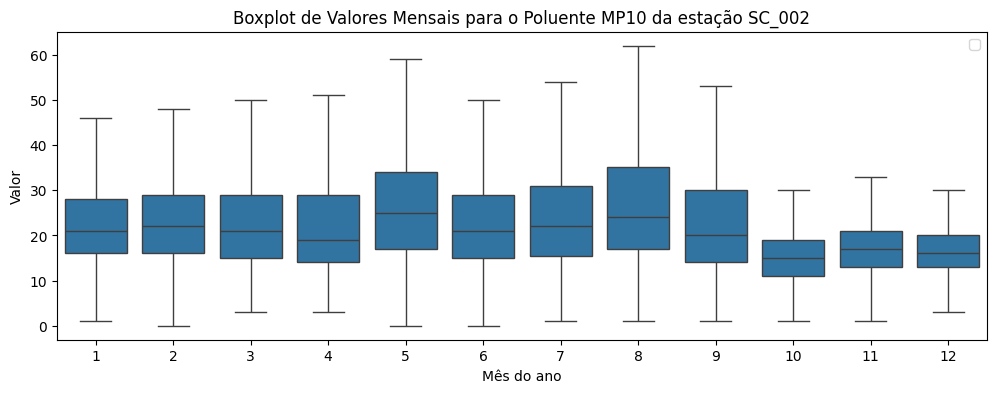

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\3213131834.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


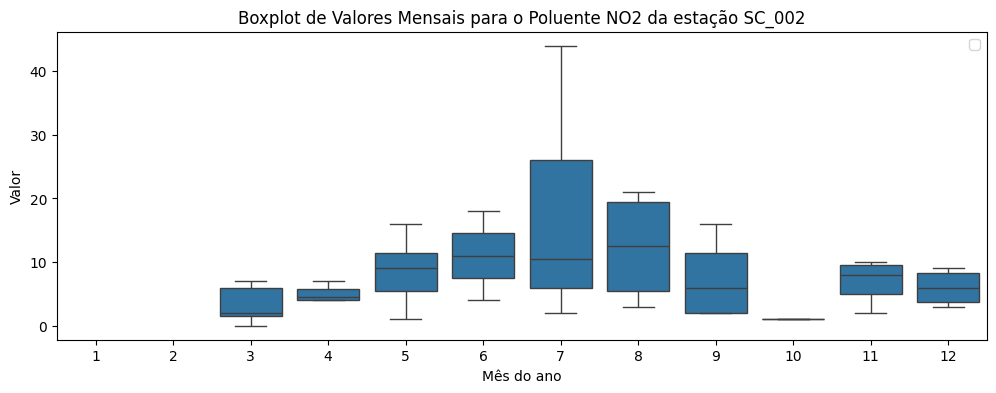

In [211]:
#Gerando gráfico Boxplot para valores mensais

def plot_boxplot(data, poluente):
   
    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Mes', y='Valor', data=data, ax=ax, showfliers=False)
    

    plt.xlabel('Mês do ano')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores Mensais para o Poluente {poluente} da estação SC_002')
    plt.legend()
    plt.show()
 


# Chamando a função para cada DataFrame
plot_boxplot(df_PTS, 'PTS')
plot_boxplot(df_SO2, 'SO2')
plot_boxplot(df_MP10, 'MP10')
plot_boxplot(df_NO2, 'NO2')


C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1221956785.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


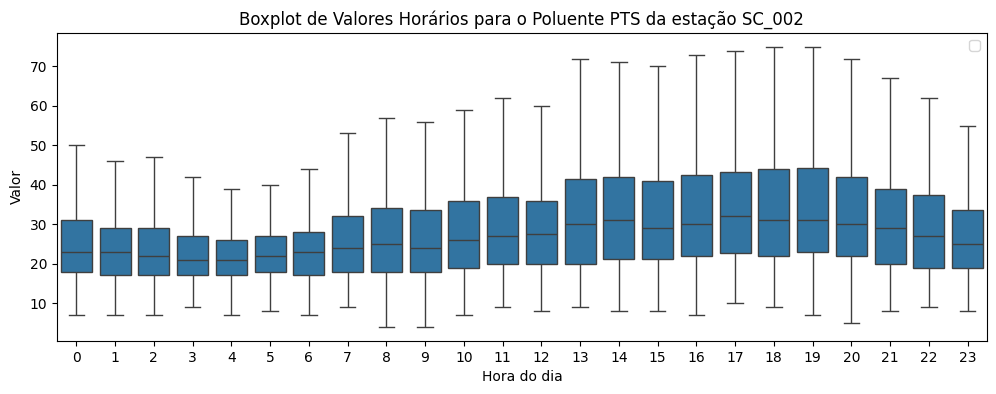

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1221956785.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


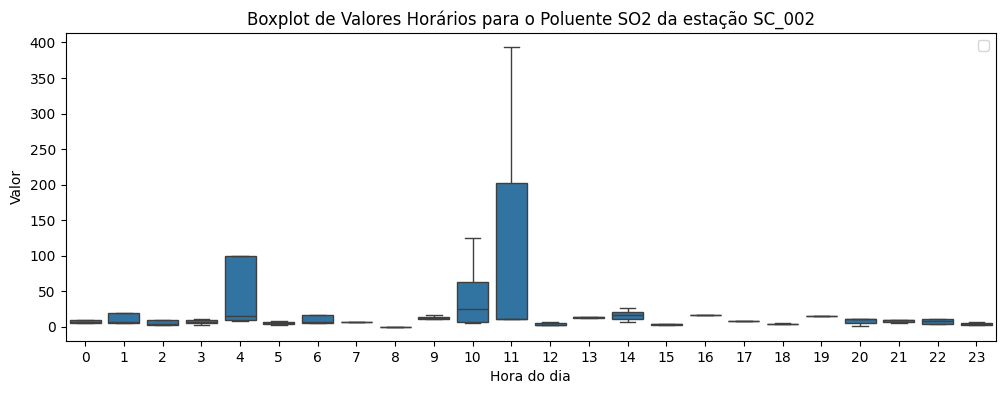

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1221956785.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


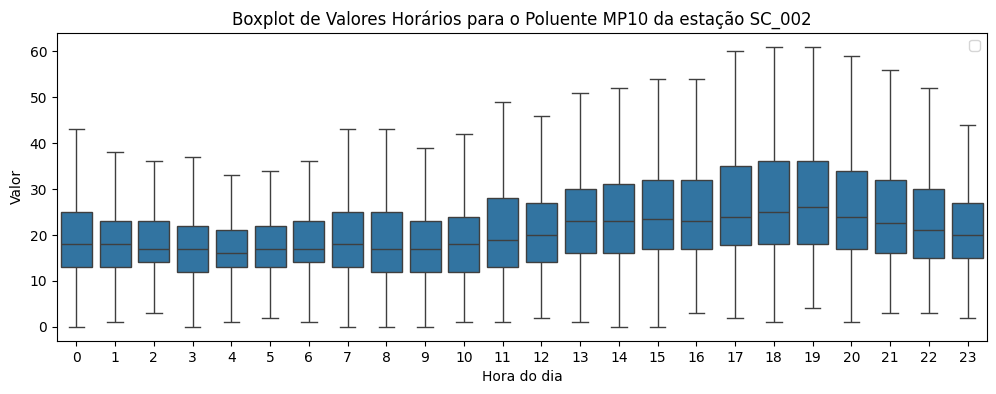

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1221956785.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


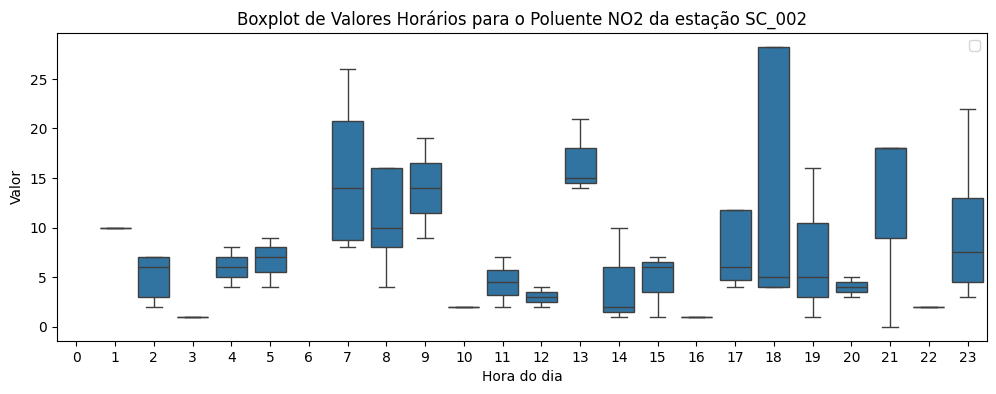

In [210]:
# Gerando gráfico boxplot para valores de hora

def plot_boxplot(data, poluente):

    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Hora', y='Valor', data=data, ax=ax, showfliers=False)
    
    plt.xlabel('Hora do dia')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores Horários para o Poluente {poluente} da estação SC_002')
    plt.legend()  
    plt.show()


# Chamando a função para cada DataFrame
plot_boxplot(df_PTS, 'PTS')
plot_boxplot(df_SO2, 'SO2')
plot_boxplot(df_MP10, 'MP10')
plot_boxplot(df_NO2, 'NO2')

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1200682576.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Estacao'] = data['Mes'].map(estacoes)
C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1200682576.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


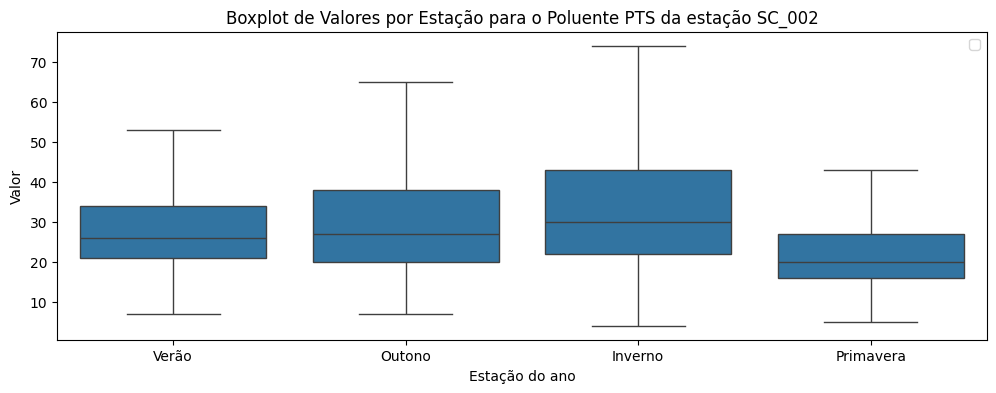

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1200682576.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


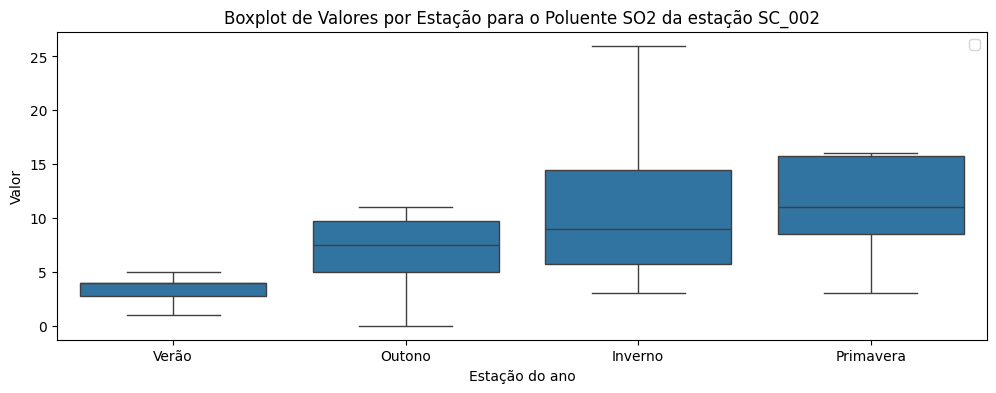

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1200682576.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


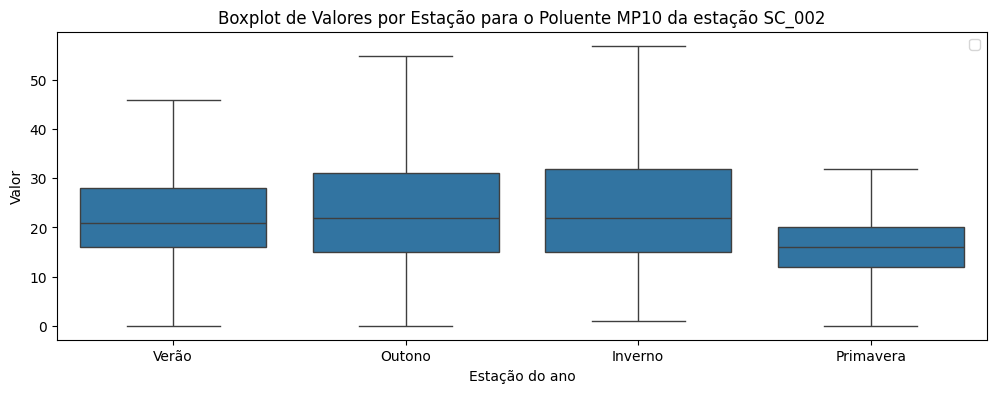

C:\Users\najuw\AppData\Local\Temp\ipykernel_1384\1200682576.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


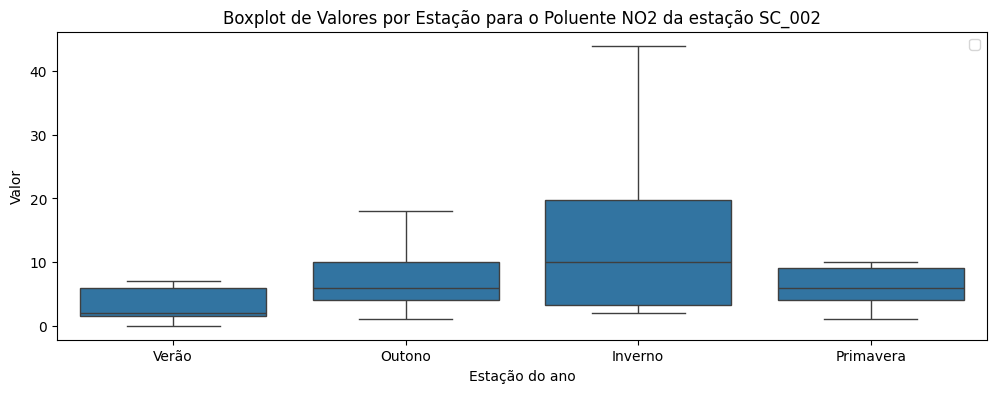

In [213]:
# Determinando e adicionando as estações

def adicionar_estacoes(data):
    estacoes = {
        1: 'Verão', 2: 'Verão', 3: 'Verão',
        4: 'Outono', 5: 'Outono', 6: 'Outono',
        7: 'Inverno', 8: 'Inverno', 9: 'Inverno',
        10: 'Primavera', 11: 'Primavera', 12: 'Primavera'
    }
    data['Estacao'] = data['Mes'].map(estacoes)
    return data


# Atualizando os DataFrames

df_PTS = adicionar_estacoes(df_PTS)
df_SO2 = adicionar_estacoes(df_SO2)
df_MP10 = adicionar_estacoes(df_MP10)
df_NO2 = adicionar_estacoes(df_NO2)


# Gerando gráfico boxplot

def plot_boxplot(data, poluente):
    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Estacao', y='Valor', data=data, ax=ax, showfliers=False)
    
    
    
    plt.xlabel('Estação do ano')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores por Estação para o Poluente {poluente} da estação SC_002')
    plt.legend()  
    plt.show()


plot_boxplot(df_PTS, 'PTS')
plot_boxplot(df_SO2, 'SO2')
plot_boxplot(df_MP10, 'MP10')
plot_boxplot(df_NO2, 'NO2')


In [190]:
# Função para descrever a coluna 'Valor' de cada poluente
def descrever_valor(data, poluente):
    print(f'Estatísticas Descritivas para o Poluente {poluente} (coluna "Valor"):')
    print(data['Valor'].describe())

# Chamando a função para cada DataFrame
descrever_valor(df_PTS, 'PTS')
descrever_valor(df_SO2, 'SO2')
descrever_valor(df_MP10, 'MP10')
descrever_valor(df_NO2, 'NO2')


Estatísticas Descritivas para o Poluente PTS (coluna "Valor"):
count    8720.000000
mean       29.447821
std        16.945012
min         4.000000
25%        19.000000
50%        26.000000
75%        35.000000
max       351.000000
Name: Valor, dtype: float64
Estatísticas Descritivas para o Poluente SO2 (coluna "Valor"):
count     76.000000
mean      22.184211
std       60.651949
min        0.000000
25%        4.000000
50%        7.500000
75%       11.000000
max      394.000000
Name: Valor, dtype: float64
Estatísticas Descritivas para o Poluente MP10 (coluna "Valor"):
count    8711.000000
mean       22.229480
std        12.757134
min         0.000000
25%        14.000000
50%        20.000000
75%        27.000000
max       260.000000
Name: Valor, dtype: float64
Estatísticas Descritivas para o Poluente NO2 (coluna "Valor"):
count    62.000000
mean      9.887097
std      13.507866
min       0.000000
25%       3.250000
50%       6.500000
75%      10.000000
max      95.000000
Name: Valor, dt

In [191]:
# Função describe para estatísticas univariadas

df = pd.DataFrame(
    columns = ['count','mean','std','min','25%','50%','75%','max']
)

def descrever_valor(data, poluente):
    
    print(f'Estatísticas Descritivas para o Poluente {poluente} (µg/m³):')
    estatisticas = data['Valor'].describe()
    
    df = estatisticas.to_frame()
    
    df = df.rename(columns={'Valor': poluente}) 
    
    df = df.transpose()
    
    # Formatando a saída para apenas 2 casas decimais
    for indice, valor in estatisticas.items():
        print(f"{indice}: {valor:.2f}")
    print('\n')  # Linha em branco para melhor visualização

    return df

df1 = descrever_valor(df_PTS, 'PTS')
df2 = descrever_valor(df_SO2, 'SO2')
df3 = descrever_valor(df_MP10, 'MP10')
df4 = descrever_valor(df_NO2, 'NO2')

df = pd.concat([df1,df2,df3,df4],axis=0)
df.index.name = 'poluente'

df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas.csv')

Estatísticas Descritivas para o Poluente PTS (µg/m³):
count: 8720.00
mean: 29.45
std: 16.95
min: 4.00
25%: 19.00
50%: 26.00
75%: 35.00
max: 351.00


Estatísticas Descritivas para o Poluente SO2 (µg/m³):
count: 76.00
mean: 22.18
std: 60.65
min: 0.00
25%: 4.00
50%: 7.50
75%: 11.00
max: 394.00


Estatísticas Descritivas para o Poluente MP10 (µg/m³):
count: 8711.00
mean: 22.23
std: 12.76
min: 0.00
25%: 14.00
50%: 20.00
75%: 27.00
max: 260.00


Estatísticas Descritivas para o Poluente NO2 (µg/m³):
count: 62.00
mean: 9.89
std: 13.51
min: 0.00
25%: 3.25
50%: 6.50
75%: 10.00
max: 95.00




In [192]:
# Estatísticas univariadas nos meses do ano

def descrever_valor_mensal(data, poluente):
    # Agrupando os dados por mês
    mes_data = data.groupby('Mes')['Valor'].describe()
    
    # Renomeando as colunas para incluir o nome do poluente
    df = mes_data.rename(columns={'count': 'count', 'mean': 'mean', 
                                       'std': 'std', 'min': 'min', 
                                       '25%': '25%', '50%': '50%', 
                                       '75%': '75%', 'max': 'max'})
    
    df = df.transpose()
    df.index.name = poluente
    
    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas Mensais para o Poluente {poluente} (µg/m³):')
    print(df.round(2))
    print('\n')  # Linha em branco para melhor visualização
    
    df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas_mensais'+poluente+'.csv')

    return df

# Chamadas de função para cada poluente
df1 = descrever_valor_mensal(df_PTS, 'PTS')
df2 = descrever_valor_mensal(df_SO2, 'SO2')
df3 = descrever_valor_mensal(df_MP10, 'MP10')
df4 = descrever_valor_mensal(df_NO2, 'NO2')

# Concatenando os resultados em um único DataFrame
df_final = pd.concat([df1, df2, df3, df4], axis=0)




Estatísticas Descritivas Mensais para o Poluente PTS (µg/m³):
Mes        1       2       3       4       5       6       7       8       9   \
PTS                                                                             
count  740.00  665.00  744.00  720.00  743.00  720.00  743.00  744.00  720.00   
mean    27.44   29.64   29.53   28.64   31.69   32.57   33.73   40.99   31.08   
std      9.48   16.24   13.97   14.48   13.57   19.77   21.41   27.10   16.75   
min      9.00    7.00    8.00    7.00    9.00    7.00    4.00    4.00    7.00   
25%     21.00   22.00   20.00   19.00   22.00   20.00   22.00   25.00   19.00   
50%     26.00   27.00   26.00   24.00   29.00   27.00   29.00   34.00   28.00   
75%     33.00   35.00   35.00   36.00   38.00   41.00   40.00   48.00   38.00   
max     99.00  351.00  112.00  118.00   98.00  155.00  318.00  283.00  190.00   

Mes        10      11      12  
PTS                            
count  744.00  720.00  717.00  
mean    20.80   24.41   22.58  

In [193]:
df1

Mes,1,2,3,4,5,6,7,8,9,10,11,12
PTS,,,,,,,,,,,,
count,740.000000,665.000000,744.000000,720.000000,743.000000,720.000000,743.000000,744.000000,720.000000,744.000000,720.000000,717.000000
mean,27.437838,29.642105,29.530914,28.643056,31.690444,32.569444,33.733513,40.989247,31.077778,20.801075,24.411111,22.581590
std,9.483134,16.235411,13.966085,14.475401,13.572149,19.773070,21.406829,27.104700,16.747891,8.787039,10.966019,10.615452
min,9.000000,7.000000,8.000000,7.000000,9.000000,7.000000,4.000000,4.000000,7.000000,5.000000,8.000000,7.000000
25%,21.000000,22.000000,20.000000,19.000000,22.000000,20.000000,22.000000,25.000000,19.000000,14.000000,17.000000,16.000000
50%,26.000000,27.000000,26.000000,24.000000,29.000000,27.000000,29.000000,34.000000,28.000000,19.000000,22.000000,20.000000
75%,33.000000,35.000000,35.000000,36.000000,38.000000,41.000000,40.000000,48.000000,38.000000,26.000000,29.000000,26.000000
max,99.000000,351.000000,112.000000,118.000000,98.000000,155.000000,318.000000,283.000000,190.000000,69.000000,106.000000,124.000000


In [194]:
# Estatísticas univariadas nas horas do ano

def descrever_valor_hora(data, poluente):
    # Agrupando os dados por mês
    hora_data = data.groupby('Hora')['Valor'].describe()
    
    # Renomeando as colunas para incluir o nome do poluente
    df = hora_data.rename(columns={'count': 'count', 'mean': 'mean', 
                                       'std': 'std', 'min': 'min', 
                                       '25%': '25%', '50%': '50%', 
                                       '75%': '75%', 'max': 'max'})
    
    df = df.transpose()
    df.index.name = poluente
    
    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas Horárias para o Poluente {poluente} (µg/m³):')
    print(df.round(2))
    print('\n')  # Linha em branco para melhor visualização
    
    df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas_hora'+poluente+'.csv')

    return df

# Chamadas de função para cada poluente
df1 = descrever_valor_hora(df_PTS, 'PTS')
df2 = descrever_valor_hora(df_SO2, 'SO2')
df3 = descrever_valor_hora(df_MP10, 'MP10')
df4 = descrever_valor_hora(df_NO2, 'NO2')

# Concatenando os resultados em um único DataFrame
df_final = pd.concat([df1, df2, df3, df4], axis=0)


Estatísticas Descritivas Horárias para o Poluente PTS (µg/m³):
Hora       0       1       2       3       4       5       6       7       8   \
PTS                                                                             
count  363.00  364.00  364.00  364.00  364.00  364.00  364.00  364.00  363.00   
mean    25.58   24.36   23.98   22.68   22.35   23.10   24.20   26.18   27.49   
std     10.70    9.60   11.90    8.29    9.25    7.67   17.29   11.21   13.94   
min      7.00    7.00    7.00    9.00    7.00    8.00    7.00    9.00    4.00   
25%     18.00   17.00   17.00   17.00   17.00   18.00   17.00   18.00   18.00   
50%     23.00   23.00   22.00   21.00   21.00   22.00   23.00   24.00   25.00   
75%     31.00   29.00   29.00   27.00   26.00   27.00   28.00   32.00   34.00   
max     69.00   67.00  165.00   67.00  124.00   55.00  318.00   90.00  100.00   

Hora       9   ...      14      15      16      17      18      19      20  \
PTS            ...                              

In [195]:
# Estatísticas univariadas naos dias da semana do ano

def descrever_valor_dia(data, poluente):
    # Agrupando os dados por mês
    dia_data = data.groupby('Dia_da_Semana')['Valor'].describe()
    
    # Renomeando as colunas para incluir o nome do poluente
    df = dia_data.rename(columns={'count': 'count', 'mean': 'mean', 
                                       'std': 'std', 'min': 'min', 
                                       '25%': '25%', '50%': '50%', 
                                       '75%': '75%', 'max': 'max'})
    
    df = df.transpose()
    df.index.name = poluente
    
    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas dos Dias da Semana para o Poluente {poluente} (µg/m³):')
    print(df.round(2))
    print('\n')  # Linha em branco para melhor visualização
    
    df.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas\estatisticas_dia'+poluente+'.csv')

    return df

# Chamadas de função para cada poluente
df1 = descrever_valor_dia(df_PTS, 'PTS')
df2 = descrever_valor_dia(df_SO2, 'SO2')
df3 = descrever_valor_dia(df_MP10, 'MP10')
df4 = descrever_valor_dia(df_NO2, 'NO2')

# Concatenando os resultados em um único DataFrame
df_final = pd.concat([df1, df2, df3, df4], axis=0)


Estatísticas Descritivas dos Dias da Semana para o Poluente PTS (µg/m³):
Dia_da_Semana      Dom      Qua      Qui      Seg      Sex      Sáb      Ter
PTS                                                                         
count          1271.00  1247.00  1248.00  1231.00  1244.00  1244.00  1235.00
mean             24.70    31.89    31.21    30.05    31.11    27.14    30.14
std              10.86    18.96    18.10    22.37    17.50    12.51    14.40
min               4.00     7.00     8.00     7.00     5.00     8.00     4.00
25%              18.00    20.00    20.00    18.00    20.00    18.00    20.00
50%              22.00    27.00    28.00    26.00    27.00    24.00    27.00
75%              29.00    39.00    37.00    36.00    37.00    33.00    37.00
max              94.00   178.00   223.00   351.00   237.00   106.00   137.00


Estatísticas Descritivas dos Dias da Semana para o Poluente SO2 (µg/m³):
Dia_da_Semana    Dom     Qua    Qui    Seg    Sex     Sáb     Ter
SO2             